# Analyze IP File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ScamAdviser

dfSA = pd.read_csv('ScamWebsites.csv')
print('Shape before', dfSA.shape)
dfSA = dfSA[dfSA['API response'] == 200]
print('Shape after including only successful sites', dfSA.shape)
dfSA.head()

In [84]:
dfSA = pd.read_csv("ScamWebsites.csv")

In [85]:
print("Number of Unique ISPs:",len(pd.unique(dfSA['ISP name'])))

Number of Unique ISPs: 247


In [86]:
ISP_dict = {}

In [87]:
for i in range(dfSA.shape[0]):
    ISP = dfSA.iloc[i]['ISP name'] # loc uses index label, iloc does not
    
    if ISP != ISP: # nan
        continue
    
    #print(ISP)
    ISP_dict[ISP] = ISP_dict.get(ISP,0) + 1

In [88]:
# combine large companies
companies = ["Amazon", "Huawei", "Google", "Ali", "Tencent", "DingFeng", "GoDaddy", "Microsoft", "CloudFlare"]
ISP_dict_keys = list(ISP_dict.keys())
ISP_dict['Other'] = 0

for key in companies:
    ISP_dict[key] = 0
    for isp_key in ISP_dict_keys:
        if key in isp_key: # if isp_key belongs to umbrella company
            ISP_dict[key] += ISP_dict[isp_key]
            ISP_dict.pop(isp_key, 0) # remove key from dict

# now go through and remove independent ISPs
for isp_key in list(ISP_dict.keys()):
    if ISP_dict[isp_key] <= 10:
        ISP_dict['Other'] += 1
        ISP_dict.pop(isp_key,0)

In [89]:
ISP_dict.pop("Other",0)

209

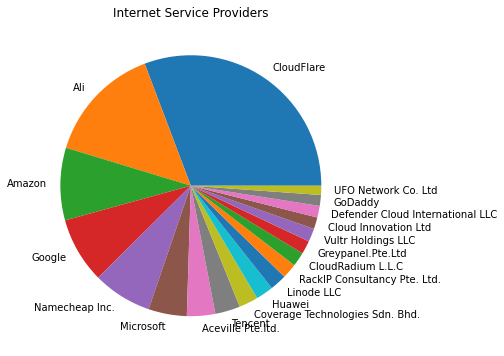

In [90]:
# make pie chart
labels = list(ISP_dict.keys())
values = [ISP_dict[x] for x in labels]

# sort
idx_sorted = np.argsort(values)[::-1]
values = [values[x] for x in idx_sorted]
labels = [labels[x] for x in idx_sorted]

fig, ax = plt.subplots(figsize=(8,6))
plt.title('Internet Service Providers')
plt.pie(values,labels=labels)
plt.savefig('ISPs.png',bbox_inches="tight")
plt.show()

In [91]:
ISP_dict['CloudFlare'] + ISP_dict['Amazon'] + ISP_dict['Google'] + ISP_dict['Microsoft']

510

**Countries Represented**

In [13]:
print('Countries represented:', len(pd.unique(dfSA['IP country'])))

Countries represented: 31


In [14]:
loc_dict = {}

for i in range(dfSA.shape[0]):
    country = dfSA.iloc[i]['IP country']
    
    # nan catch
    if country != country:
        continue
    
    loc_dict[country] = loc_dict.get(country,0) + 1

In [15]:
loc_dict["Other"] = 0
loc_dict_keys = list(loc_dict.keys())

for key in loc_dict_keys:
    if loc_dict[key] == 1:
        loc_dict["Other"] += 1
        loc_dict.pop(key,0) # remove

In [16]:
loc_dict.pop("Other")

12

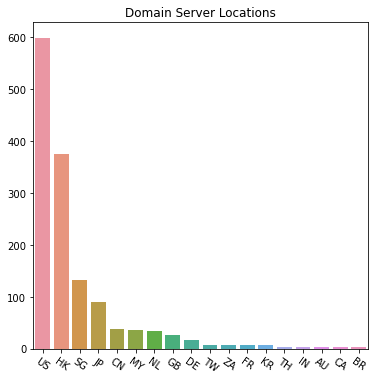

In [17]:
labels = list(loc_dict.keys())
values = [loc_dict[x] for x in labels]
idx = np.argsort(values) [::-1]
values = [values[x] for x in idx]
labels = [labels[x] for x in idx]

fig, ax = plt.subplots(figsize=(6,6))
plt.title('Domain Server Locations')
plt.xticks(rotation=-35)
sns.barplot(x = labels, y = values)

plt.savefig("DomainServerLocs.png")
plt.show()

In [18]:
loc_dict['US']

599

In [19]:
loc_dict['HK']

375

In [20]:
loc_dict['CN']

37

**Pageviews**

In [43]:
remove = ['star-clicks.com', 'funds-recovery.com', 'payback-ltd.com', 'linktr.ee']
remove_idx = []

for key in remove:
    remove_idx.append(sub[sub['Domain name'] == key].index[0])
    
remove_idx

[743, 632, 954, 923]

In [46]:
# Pageviews
sub = dfSA[dfSA['Pageviews'] == dfSA['Pageviews']]

sub = sub.drop(remove_idx, axis=0)

ordered = np.argsort(sub['Pageviews'].values)[::-1]
idx_ordered = sub.index[ordered]

views_list = []
names = []

for idx in idx_ordered[:30]:
    views_list.append(sub.loc[idx]['Pageviews'])
    names.append(sub.loc[idx]['Domain name'])

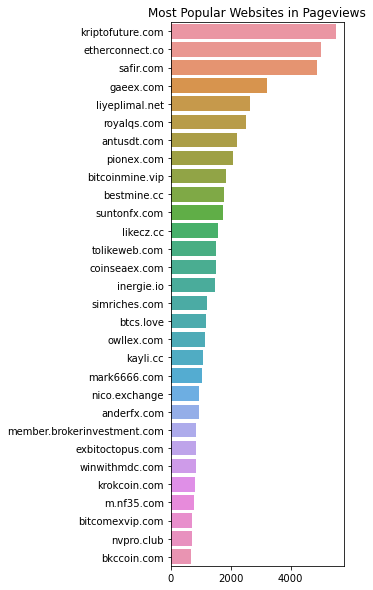

In [47]:
plt.subplots(figsize = (12,10))
sns.barplot(x = views_list, y = names, orient="h")
plt.title('Most Popular Websites in Pageviews')
plt.subplots_adjust(left=0.5, right=0.7)
plt.savefig('Pageviews.png',bbox_inches="tight")

**Registrar Name**

In [92]:
# Registrar Name
registrar_dict = {}

for i in range(dfSA.shape[0]):
    registrar = dfSA.iloc[i]['Registrar name'] # loc uses index label, iloc does not
    
    if registrar != registrar: # nan
        continue

    registrar_dict[registrar] = registrar_dict.get(registrar,0) + 1

In [93]:
len(registrar_dict)

116

In [94]:
# combine large companies
companies = ["Amazon", "Huawei", "Google", "Ali", "Tencent", "DingFeng", "GoDaddy", "Microsoft", "Dynadot"]
registrar_dict_keys = list(registrar_dict.keys())
registrar_dict['Other'] = 0

for key in companies:
    registrar_dict[key] = 0
    for registrar_key in registrar_dict_keys:
        if key.upper() in registrar_key.upper(): # if isp_key belongs to umbrella company
            registrar_dict[key] += registrar_dict[registrar_key]
            if key != registrar_key:
                registrar_dict.pop(registrar_key, 0) # remove key from dict

# now go through and remove independent ISPs
for registrar_key in list(registrar_dict.keys()):
    if registrar_dict[registrar_key] <= 15:
        registrar_dict['Other'] += 1
        registrar_dict.pop(registrar_key,0)

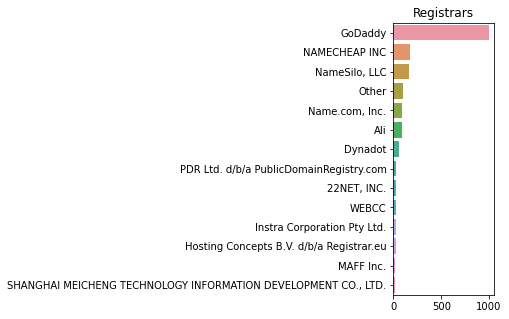

In [96]:
# make pie chart
labels = list(registrar_dict.keys())
values = [registrar_dict[x] for x in labels]

# sort
sort_idx = np.argsort(values)[::-1]
values = [values[x] for x in sort_idx]
labels = [labels[x] for x in sort_idx]

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Registrars')
sns.barplot(x = values, y = labels, orient = "h")
plt.subplots_adjust(left=0.7)
plt.savefig('Registrars.png',bbox_inches="tight")
plt.show()

In [54]:
registrar_dict['GoDaddy']

1004

In [55]:
registrar_dict['NAMECHEAP INC']

176

In [56]:
registrar_dict['NameSilo, LLC']

167

**Domain Extension**

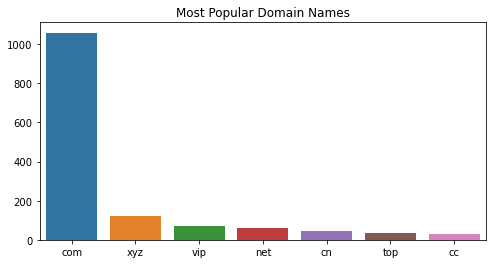

In [58]:
# domain extension
#pd.unique(dfSA['Domain extension'])
data = dfSA.groupby('Domain extension').count()['Requested domain']
labels = data.index
values = data.values

# sort
idx_sorted = np.argsort(values)[::-1]
values = [values[x] for x in idx_sorted]
labels = [labels[x] for x in idx_sorted]

plt.subplots(figsize=(8,4))
sns.barplot(y = values[:7], x = labels[:7], orient = "v")
plt.title('Most Popular Domain Names')
plt.savefig('Domains.png',bbox_inches="tight")
plt.show()

In [59]:
print('Countries represented:', len(pd.unique(dfSA['Registrant country'])))

Countries represented: 45


In [69]:
loc_dict = {}

for i in range(dfSA.shape[0]):
    country = dfSA.iloc[i]['Registrant country']
    
    # nan catch
    if country != country:
        continue
    
    loc_dict[country] = loc_dict.get(country,0) + 1

In [70]:
loc_dict["Other"] = 0
loc_dict_keys = list(loc_dict.keys())

for key in loc_dict_keys:
    if loc_dict[key] == 1:
        loc_dict["Other"] += 1
        loc_dict.pop(key,0) # remove

In [71]:
# rename
loc_dict['PH'] += loc_dict['Philippines']
loc_dict.pop('Philippines',0)
loc_dict.pop('Redacted for privacy',0)
loc_dict['US'] += loc_dict['United States']
loc_dict.pop('United States',0)
loc_dict['MY'] += loc_dict['Malaysia']
loc_dict.pop('Malaysia',0)
loc_dict['CN'] += loc_dict['China']
loc_dict.pop('China',0)
loc_dict['HK,CN'] += loc_dict['HK']
loc_dict.pop('HK,CN',0)

104

In [72]:
loc_dict.pop("Other",0)

17

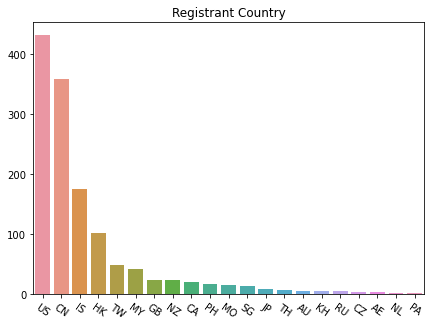

In [73]:
labels = list(loc_dict.keys())
values = [loc_dict[x] for x in labels]
idx = np.argsort(values) [::-1]
values = [values[x] for x in idx]
labels = [labels[x] for x in idx]

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Registrant Country')
plt.xticks(rotation=-35)
sns.barplot(x = labels, y = values)

plt.savefig("RegistrantCountry.png",bbox_inches="tight")
plt.show()

In [74]:
# Idea: create a timeline of when these domains were created

**Time**

In [75]:
from datetime import datetime
import matplotlib

In [76]:
dates = []

In [77]:
for i in range(dfSA.shape[0]):
    row = dfSA.iloc[i]
    date_str = row['Created at']
    
    # nan
    if date_str != date_str:
        continue

    date = datetime.strptime(date_str, '%m/%d/%Y')
    dates.append(date)

In [78]:
datetime(20,12,1)

datetime.datetime(20, 12, 1, 0, 0)

In [79]:
years = set([x.year for x in dates])
plot_dict = {}

for year in years: # possible years
    for x in range(1,13): # month
        new_key = datetime(year,x,1)
        plot_dict[new_key] = 0 # initialize
        
        if year == 2020 and x <= 7:
            continue
        
        if year == 2021 and x == 10:
            break

In [80]:
for date in dates:
    create_key = datetime(date.year,date.month,1)
    plot_dict[create_key] = plot_dict[create_key] + 1

In [81]:
keys = list(plot_dict.keys())
values = [plot_dict[x] for x in keys]

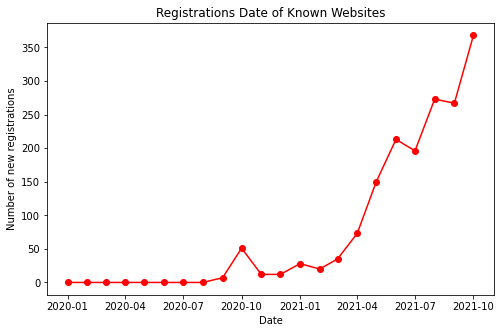

In [83]:
dates2 = matplotlib.dates.date2num(keys)
plt.subplots(figsize=(8,5))
plt.plot_date(dates2, values, linestyle='-',color="red")
plt.title('Registrations Date of Known Websites')
plt.xlabel('Date')
plt.ylabel('Number of new registrations')
plt.savefig('WebsiteDates.png',bbox_inches="tight")
plt.show()